In [77]:
from netCDF4 import Dataset
from glob import glob
import numpy as np

root_dir: str = '/home/guc/'
# model_dir: str = 'Build_WRF/models/real/run/'
model_dir: str = 'runs/001-seabreeze/'

all_files = glob(root_dir + model_dir + 'wrfout*')
print(all_files)

['/home/guc/runs/001-seabreeze/wrfout_d01_2025-03-09_00:00:00']


In [78]:
import matplotlib.pyplot as plt

def list_variables(dataset: Dataset) -> None:
    '''
    List all variables in the nc dataset for adjustment
    dataset:    netcdf dataset
    '''
    print('\n'.join(map(lambda x: f'{x.name}: {dataset[x.name].__dict__.get('description')} {x.dimensions} {x.shape}', dataset.variables.values())))

# Check the values in the selected wrfbdy file
dataset = Dataset(all_files[0])

# A function to list all the variables in this file
list_variables(dataset)

Times: None ('Time', 'DateStrLen') (5, 19)
XLAT: LATITUDE, SOUTH IS NEGATIVE ('Time', 'south_north', 'west_east') (5, 99, 99)
XLONG: LONGITUDE, WEST IS NEGATIVE ('Time', 'south_north', 'west_east') (5, 99, 99)
LU_INDEX: LAND USE CATEGORY ('Time', 'south_north', 'west_east') (5, 99, 99)
ZNU: eta values on half (mass) levels ('Time', 'bottom_top') (5, 44)
ZNW: eta values on full (w) levels ('Time', 'bottom_top_stag') (5, 45)
ZS: DEPTHS OF CENTERS OF SOIL LAYERS ('Time', 'soil_layers_stag') (5, 4)
DZS: THICKNESSES OF SOIL LAYERS ('Time', 'soil_layers_stag') (5, 4)
VAR_SSO: variance of subgrid-scale orography ('Time', 'south_north', 'west_east') (5, 99, 99)
BATHYMETRY_FLAG: Flag for bathymetry in the global attributes for metgrid data ('Time',) (5,)
U: x-wind component ('Time', 'bottom_top', 'south_north', 'west_east_stag') (5, 44, 99, 100)
V: y-wind component ('Time', 'bottom_top', 'south_north_stag', 'west_east') (5, 44, 100, 99)
W: z-wind component ('Time', 'bottom_top_stag', 'south_nor

Displaying frame 5 of 5 (1-index)


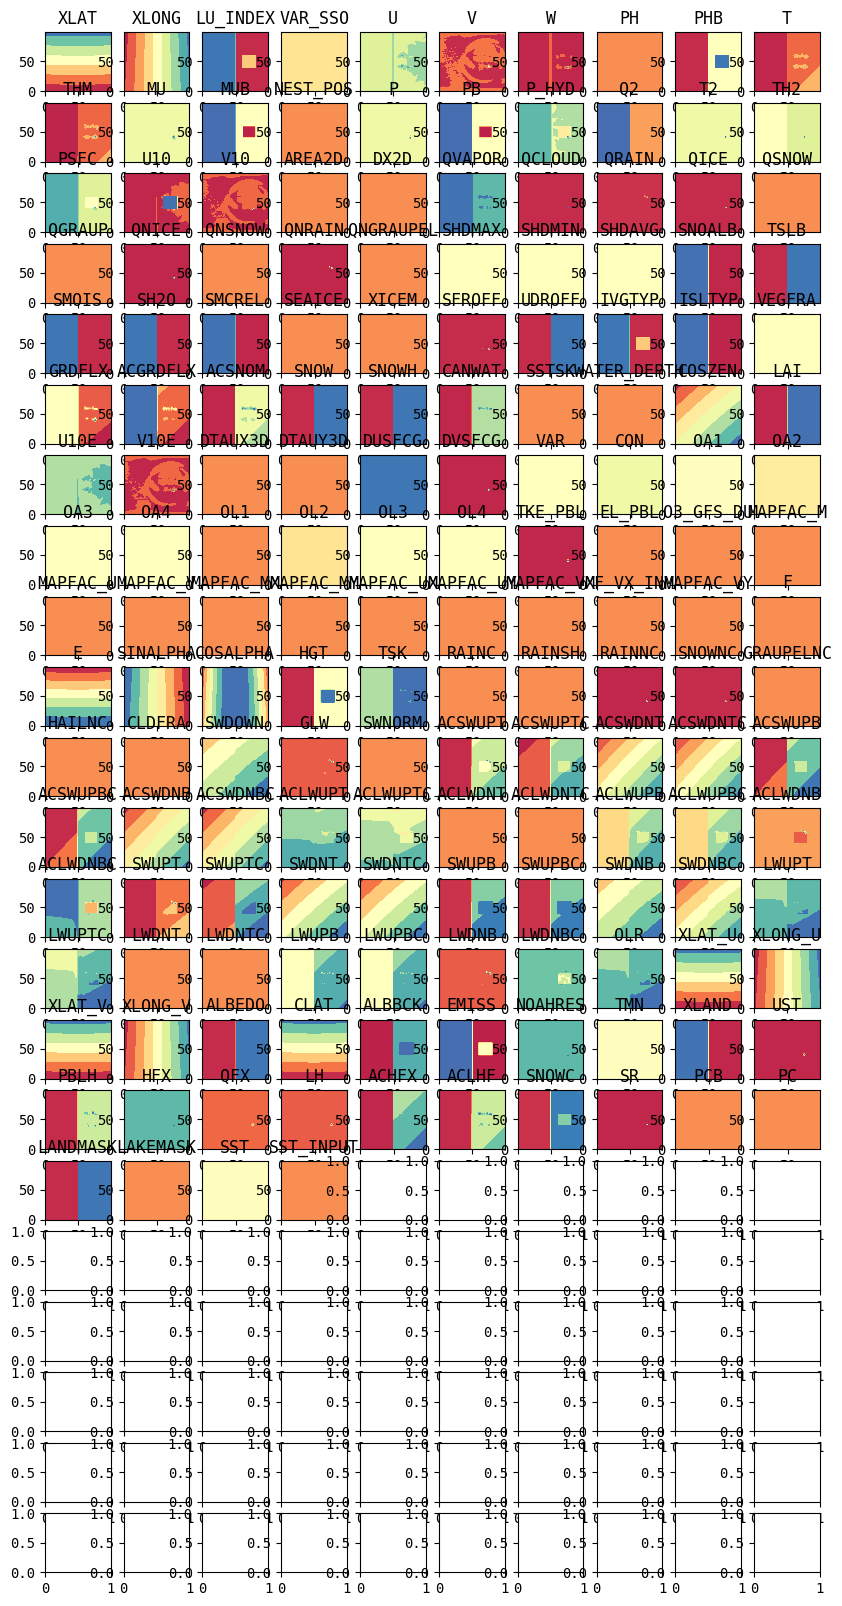

In [85]:
import math

VAR_INDEX = 5

def plot_all_vars(dataset: Dataset) -> None:
    global VAR_INDEX
    print(f'Displaying frame {VAR_INDEX} of {dataset.variables['XLAT'].shape[0]} (1-index)')
    cols_num, len_vars = 10, len(dataset.variables)
    _, axes = plt.subplots(math.ceil(len_vars / cols_num), cols_num, figsize=(10, 20))
    idx: int = 0
    for var in dataset.variables.values():
        i, j = idx // cols_num, idx % cols_num
        axes[i][j].set_title(var.name, x=0.5, y=0.35, fontweight="500", fontsize=6)
        if j != 0: axes[i][j].set_yticklabels([])
        if i != 0: axes[i][j].set_xticklabels([])
        if len(var.shape) == 3: axes[i][j].contourf(var[VAR_INDEX - 1], cmap='Spectral')
        elif len(var.shape) == 4: axes[i][j].contourf(var[VAR_INDEX - 1][0], cmap='Spectral')
        else: continue
        idx += 1

plot_all_vars(dataset)